## Heatmaps

### Fed Avg Sat


In [2]:
# Just some settings I set when running the tests that will make it easier to build the gaphs

epochs = [10] #[5,10,25,50,100]
sats = [1,2,5,10] #[1,2,5,10,25,50]
clusters = [1,2,5,10] #[1,5,25]
name = ["1_gs","2_gs","3_gs","5_gs","10_gs","all_gs"]
n_sat_c = 2
n_c = 25

config = {
        "name": "Pls",
        "round": 500,
        "epochs": 3,
        "trial": 5,
        "clients": n_sat_c*n_c,
        "client_limit": 10,
        "dataset": "FEMNIST",
        "alg": "fedAvgSat",
        "learning_rate": 0.001,
        "momentum": 0.9,
        "wait_time" : 7,
        "sim_fname" : "/datasets/landsat/10s_10c_s_landsat.csv",
        "n_sat_in_cluster" : n_sat_c,
        "n_cluster" : n_c,
        "gs_locations" : "[Boston,]"
    }




In [17]:
import wandb
api = wandb.Api()

results = {}
for name_list in name:
    data = np.zeros((4,4))
    data2 = np.zeros((4,4))
    data3 = np.zeros((4,4))
    data4 = np.zeros((4,4))
    rows = 0
    cols = 0
    for epoch in epochs:
        for sat in sats:
            for cluster in clusters:
                config["epochs"] = str(epoch)
                config["n_sat_in_cluster"] = str(sat)
                config["clients"] = str(sat*cluster)
                config["n_cluster"] = str(cluster)
                config["name"] = name_list
                t_name = "Work4_19"  
                for keys in config.keys():
                    if keys != "sim_fname" and keys != "gs_locations":
                        t_name = t_name + "_"+keys[:1]+str(config[keys])
                print(t_name)
                if not (rows == 0 and cols == 0):
                    runs = api.runs("fed_sats/"+t_name)
                    x = []
                    y = []
                    z = []
                    a = []
                    for run in runs:
                        x.append(np.nanmax(run.history()["acc"]))
                        y.append(np.nanmean(run.history()["duration"]))
                        z.append(np.nanmean(run.history()["idle_time_total"]))
                        a.append(np.nanmean(run.history()["idle_time_avg"]))

                    data[rows,cols] = np.mean(x)
                    data2[rows,cols] = np.mean(y)
                    data3[rows,cols] = np.mean(z)
                    data4[rows,cols] = np.mean(a)
                cols += 1
            cols = 0
            rows += 1
    results[name_list+"_acc"] = data
    results[name_list+"_duration"] = data2
    results[name_list+"_idle_time_total_avg"] = data3
    results[name_list+"_idle_time_sat_avg"] = data4


Work4_19_n1_gs_r500_e10_t5_c1_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n1_n1
Work4_19_n1_gs_r500_e10_t5_c2_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n1_n2


KeyboardInterrupt: 

In [ ]:
import pickle

# save dictionary to person_data.pkl file
with open('fedavg.pkl', 'wb') as fp:
    pickle.dump(results, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file


In [ ]:
import pickle 
with open('fedavg.pkl', 'rb') as fp:
    results_read = pickle.load(fp)

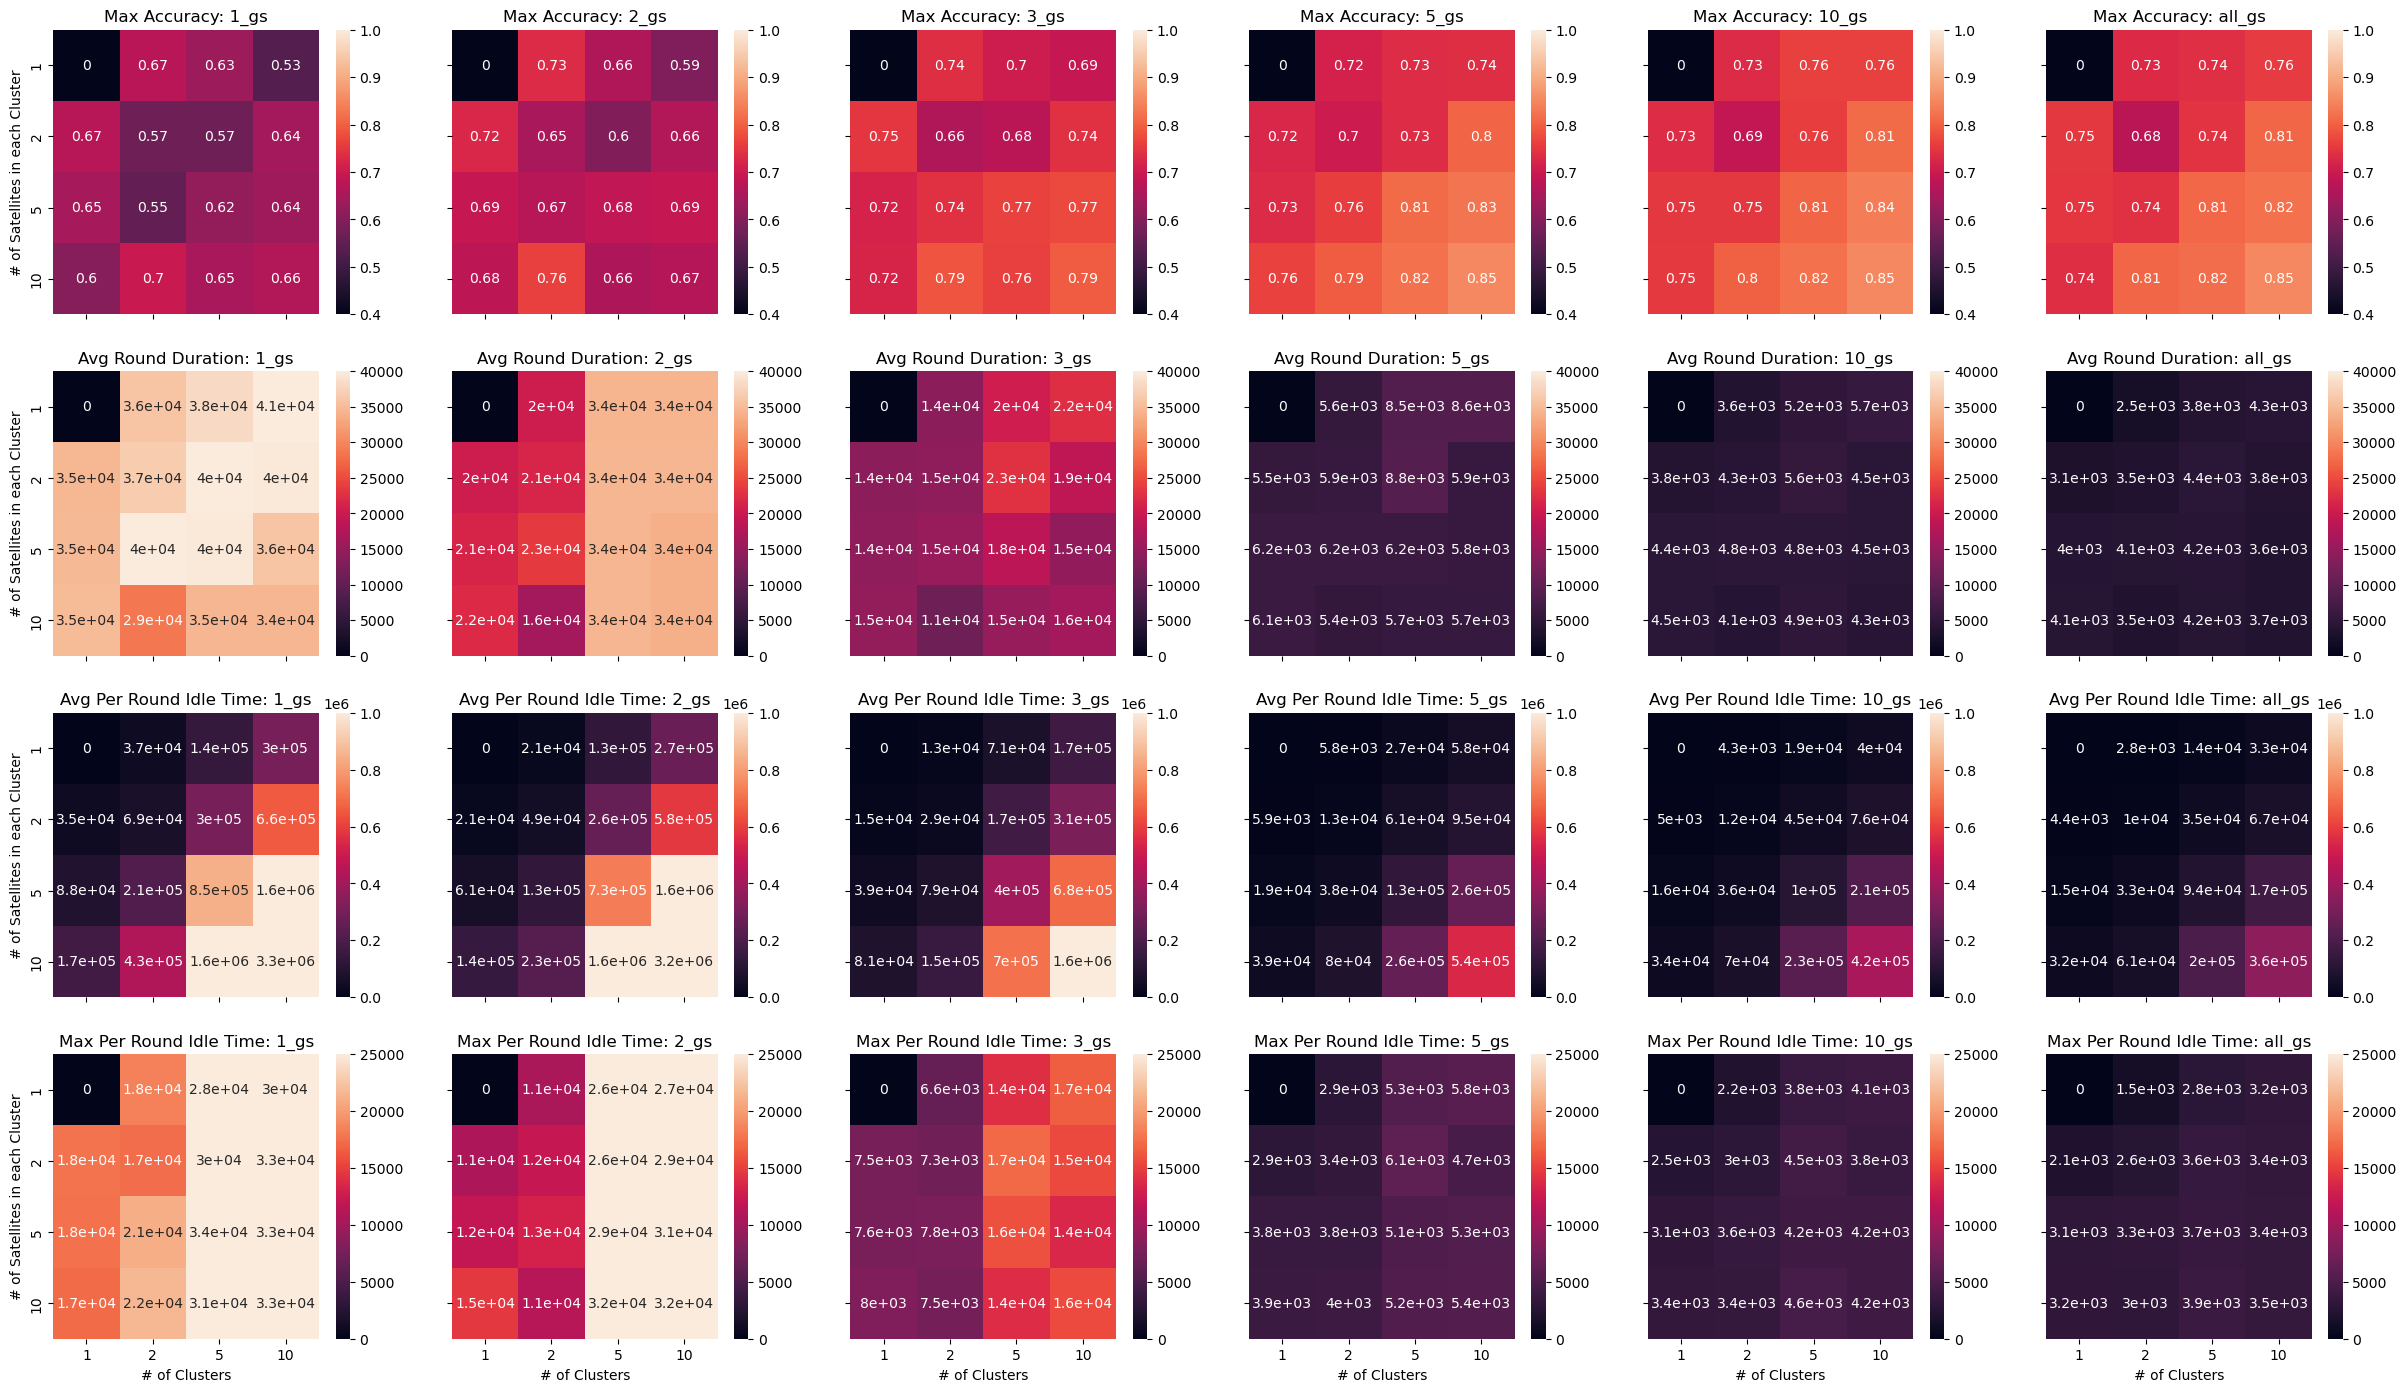

In [12]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax =  plt.subplots(4, 6, figsize=(30,17),sharex=True, sharey=True)
for i,name_list in zip(range(6),name):
    if i == 0:
        plt.subplot(4, 6, i+1)
        sns.heatmap(results_read[name_list+"_acc"],annot=True,vmin=0.4, vmax=1,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10]).set( ylabel='# of Satellites in each Cluster')
        plt.title("Max Accuracy: "+ name_list)
        
        plt.subplot(4, 6, i+7)
        sns.heatmap(results_read[name_list+"_duration"],annot=True,vmin=0, vmax=40000,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10]).set( ylabel='# of Satellites in each Cluster')
        plt.title("Avg Round Duration: "+ name_list)

        plt.subplot(4, 6, i+13)
        sns.heatmap(results_read[name_list+"_idle_time_total_avg"],annot=True,vmin=0, vmax=1000000,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10]).set( ylabel='# of Satellites in each Cluster')
        plt.title("Avg Per Round Idle Time: "+ name_list)

        plt.subplot(4, 6, i+19)
        sns.heatmap(results_read[name_list+"_idle_time_sat_avg"],annot=True,vmin=0, vmax=25000,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10]).set(xlabel='# of Clusters', ylabel='# of Satellites in each Cluster')
        plt.title("Max Per Round Idle Time: "+ name_list)
    else:
        plt.subplot(4, 6, i+1)
        sns.heatmap(results_read[name_list+"_acc"],annot=True,vmin=0.4, vmax=1,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10])
        plt.title("Max Accuracy: "+ name_list)
        
        plt.subplot(4, 6, i+7)
        sns.heatmap(results_read[name_list+"_duration"],annot=True,vmin=0, vmax=40000,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10])
        plt.title("Avg Round Duration: "+ name_list)

        plt.subplot(4, 6, i+13)
        sns.heatmap(results_read[name_list+"_idle_time_total_avg"],annot=True,vmin=0, vmax=1000000,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10])
        plt.title("Avg Per Round Idle Time: "+ name_list)

        plt.subplot(4, 6, i+19)
        sns.heatmap(results_read[name_list+"_idle_time_sat_avg"],annot=True,vmin=0, vmax=25000,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10]).set(xlabel='# of Clusters')
        plt.title("Max Per Round Idle Time: "+ name_list)

plt.show()

### Fed Avg Schedule (2) Heatmap

In [101]:
# Just some settings I set when running the tests that will make it easier to build the gaphs

epochs = [10] #[5,10,25,50,100]
sats = [1,2,5,10] #[1,2,5,10,25,50]
clusters = [1,2,5,10] #[1,5,25]
name = ["1_gs","2_gs","3_gs","5_gs","10_gs","all_gs"]
n_sat_c = 2
n_c = 25

config = {
        "name": "Pls",
        "round": 500,
        "epochs": 3,
        "trial": 5,
        "clients": n_sat_c*n_c,
        "client_limit": 10,
        "dataset": "FEMNIST",
        "alg": "fedAvg2Sat",
        "learning_rate": 0.001,
        "momentum": 0.9,
        "wait_time" : 7,
        "sim_fname" : "/datasets/landsat/10s_10c_s_landsat.csv",
        "n_sat_in_cluster" : n_sat_c,
        "n_cluster" : n_c,
        "gs_locations" : "[Boston,]"
    }

import wandb
api = wandb.Api()

results2 = {}
for name_list in name:
    data = np.zeros((4,4))
    data2 = np.zeros((4,4))
    data3 = np.zeros((4,4))
    data4 = np.zeros((4,4))
    rows = 0
    cols = 0
    for epoch in epochs:
        for sat in sats:
            for cluster in clusters:
                config["epochs"] = str(epoch)
                config["n_sat_in_cluster"] = str(sat)
                config["clients"] = str(sat*cluster)
                config["n_cluster"] = str(cluster)
                config["name"] = name_list
                t_name = "Work2_4_19"  
                for keys in config.keys():
                    if keys != "sim_fname" and keys != "gs_locations":
                        t_name = t_name + "_"+keys[:1]+str(config[keys])
                print(t_name)
                if not (rows == 0 and cols == 0):
                    runs = api.runs("fed_sats/"+t_name)
                    x = []
                    y = []
                    z = []
                    a = []
                    for run in runs:
                        x.append(np.nanmax(run.history()["acc"]))
                        y.append(np.nanmean(run.history()["duration"]))
                        z.append(np.nanmean(run.history()["idle_time_total"]))
                        a.append(np.nanmean(run.history()["idle_time_avg"]))

                    data[rows,cols] = np.mean(x)
                    data2[rows,cols] = np.mean(y)
                    data3[rows,cols] = np.mean(z)
                    data4[rows,cols] = np.mean(a)
                cols += 1
            cols = 0
            rows += 1
    results2[name_list+"_acc"] = data
    results2[name_list+"_duration"] = data2
    results2[name_list+"_idle_time_total_avg"] = data3
    results2[name_list+"_idle_time_sat_avg"] = data4



Work2_4_19_n1_gs_r500_e10_t5_c1_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n1_n1
Work2_4_19_n1_gs_r500_e10_t5_c2_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n1_n2
Work2_4_19_n1_gs_r500_e10_t5_c5_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n1_n5
Work2_4_19_n1_gs_r500_e10_t5_c10_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n1_n10
Work2_4_19_n1_gs_r500_e10_t5_c2_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n2_n1
Work2_4_19_n1_gs_r500_e10_t5_c4_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n2_n2
Work2_4_19_n1_gs_r500_e10_t5_c10_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n2_n5
Work2_4_19_n1_gs_r500_e10_t5_c20_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n2_n10
Work2_4_19_n1_gs_r500_e10_t5_c5_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n5_n1
Work2_4_19_n1_gs_r500_e10_t5_c10_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n5_n2
Work2_4_19_n1_gs_r500_e10_t5_c25_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n5_n5
Work2_4_19_n1_gs_r500_e10_t5_c50_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n5_n10
Work2_4_19_n1_gs_r500_e10_t5_c10_c10_dFEMNIST_afedAvg2S

In [114]:
import pickle

# save dictionary to person_data.pkl file
with open('fedavg2.pkl', 'wb') as fp:
    pickle.dump(results2, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file


In [14]:
with open('fedavg2.pkl', 'rb') as fp:
    results2_read = pickle.load(fp)

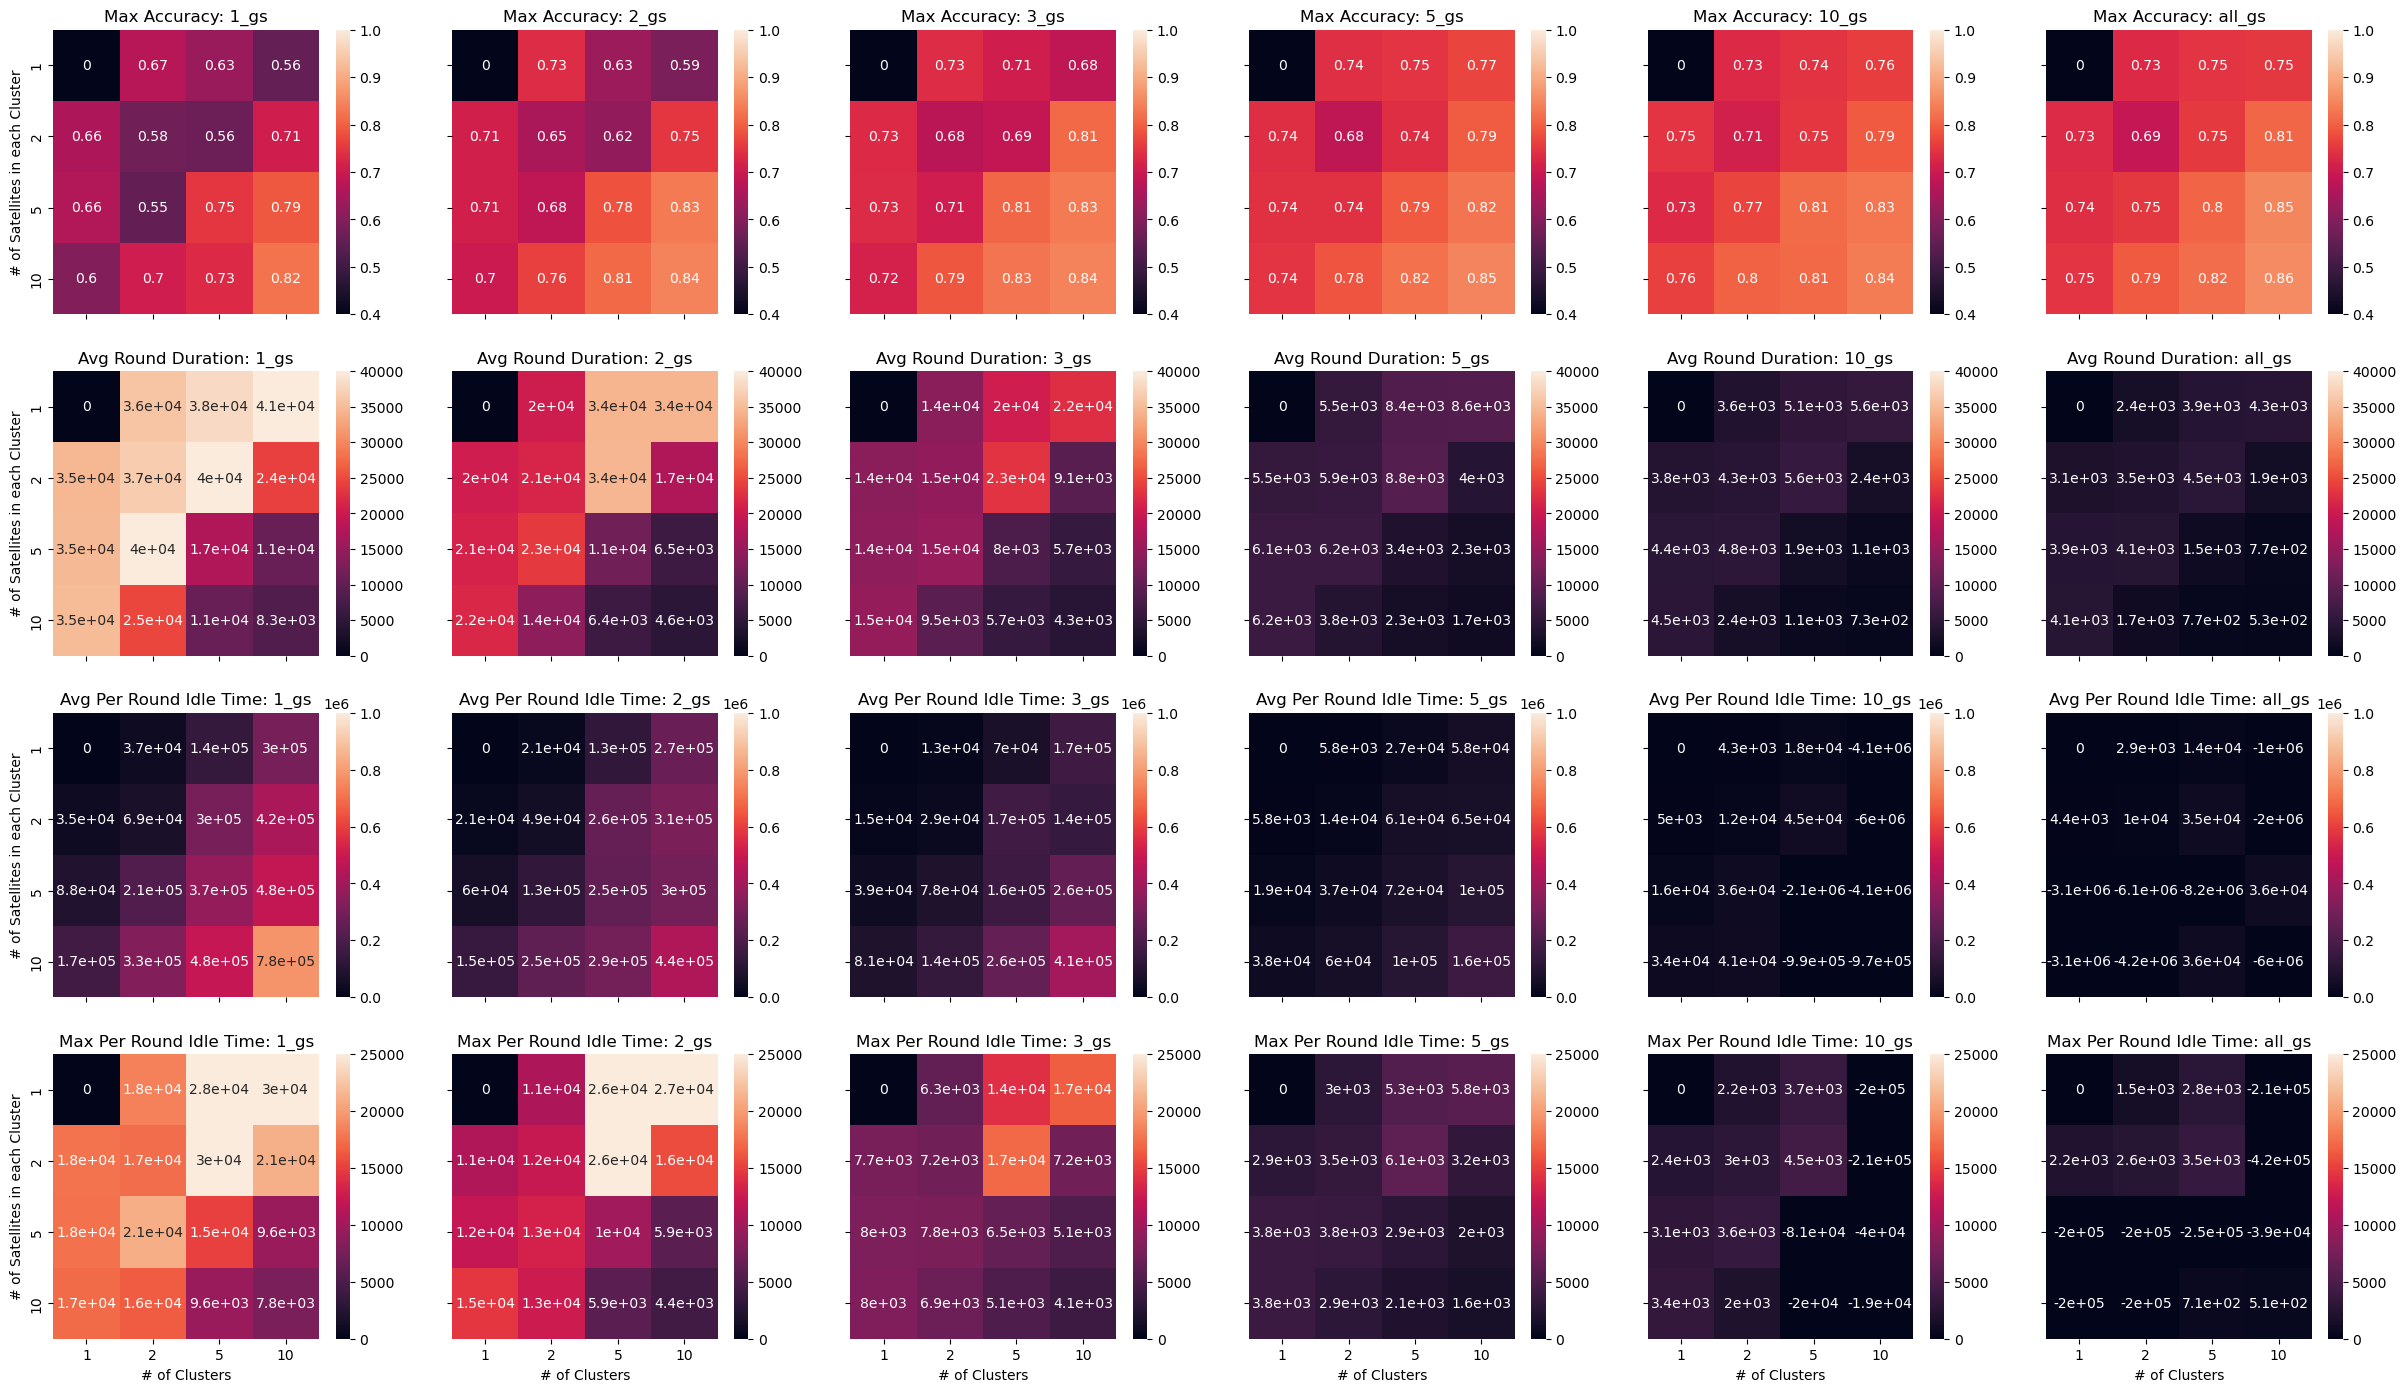

In [15]:
# library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax =  plt.subplots(4, 6, figsize=(30,17),sharex=True, sharey=True)
for i,name_list in zip(range(6),name):
    if i == 0:
        plt.subplot(4, 6, i+1)
        sns.heatmap(results2_read[name_list+"_acc"],annot=True,vmin=0.4, vmax=1,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10]).set( ylabel='# of Satellites in each Cluster')
        plt.title("Max Accuracy: "+ name_list)
        
        plt.subplot(4, 6, i+7)
        sns.heatmap(results2_read[name_list+"_duration"],annot=True,vmin=0, vmax=40000,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10]).set( ylabel='# of Satellites in each Cluster')
        plt.title("Avg Round Duration: "+ name_list)

        plt.subplot(4, 6, i+13)
        sns.heatmap(results2_read[name_list+"_idle_time_total_avg"],annot=True,vmin=0, vmax=1000000,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10]).set( ylabel='# of Satellites in each Cluster')
        plt.title("Avg Per Round Idle Time: "+ name_list)

        plt.subplot(4, 6, i+19)
        sns.heatmap(results2_read[name_list+"_idle_time_sat_avg"],annot=True,vmin=0, vmax=25000,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10]).set(xlabel='# of Clusters', ylabel='# of Satellites in each Cluster')
        plt.title("Max Per Round Idle Time: "+ name_list)
    else:
        plt.subplot(4, 6, i+1)
        sns.heatmap(results2_read[name_list+"_acc"],annot=True,vmin=0.4, vmax=1,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10])
        plt.title("Max Accuracy: "+ name_list)
        
        plt.subplot(4, 6, i+7)
        sns.heatmap(results2_read[name_list+"_duration"],annot=True,vmin=0, vmax=40000,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10])
        plt.title("Avg Round Duration: "+ name_list)

        plt.subplot(4, 6, i+13)
        sns.heatmap(results2_read[name_list+"_idle_time_total_avg"],annot=True,vmin=0, vmax=1000000,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10])
        plt.title("Avg Per Round Idle Time: "+ name_list)

        plt.subplot(4, 6, i+19)
        sns.heatmap(results2_read[name_list+"_idle_time_sat_avg"],annot=True,vmin=0, vmax=25000,xticklabels = [1,2,5,10],yticklabels = [1,2,5,10]).set(xlabel='# of Clusters')
        plt.title("Max Per Round Idle Time: "+ name_list)

plt.show()

## Line Plots (Duration)

### Fed Avg Sat Line

In [39]:
import pickle 
with open('fedavg_all_data.pkl', 'rb') as fp:
    results_data = pickle.load(fp)

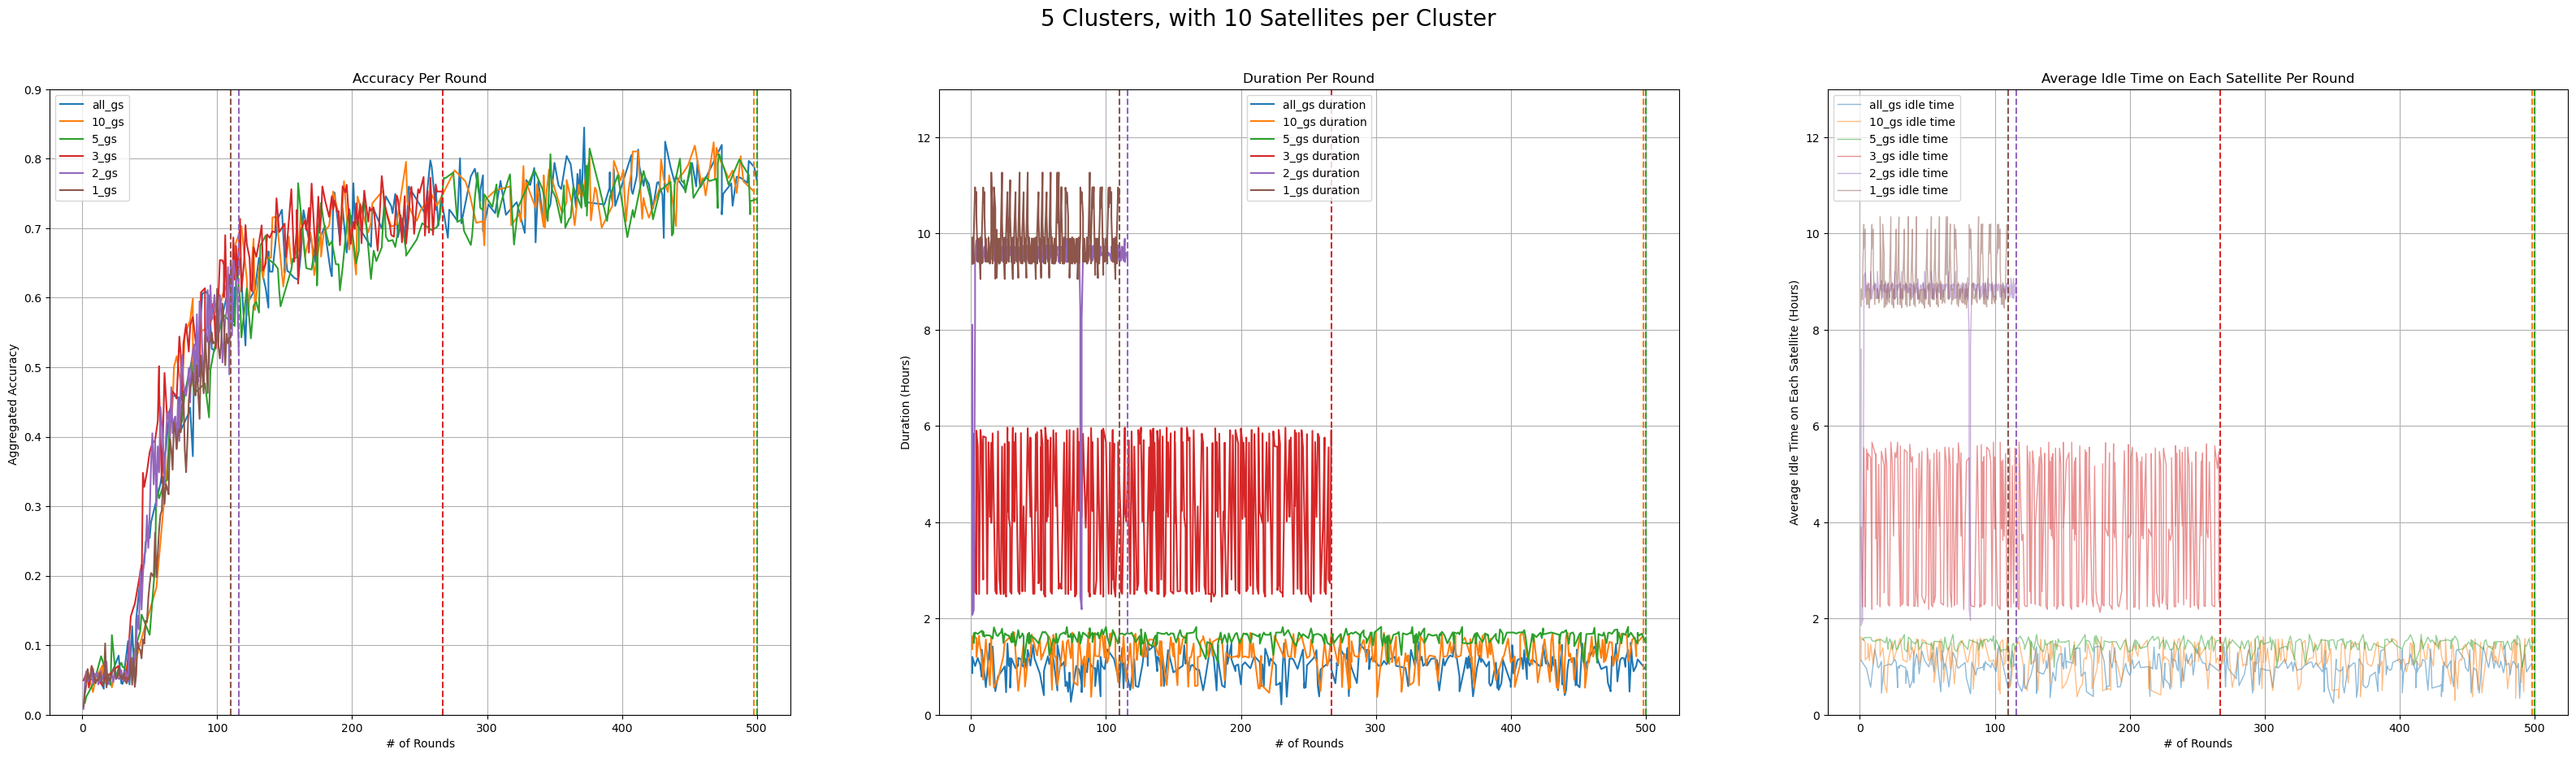

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax =  plt.subplots(1, 3, figsize=(40,10))

col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig.suptitle("5 Clusters, with 10 Satellites per Cluster", fontsize=20)
plt.subplot(1, 3, 1)
for name_list,i in zip(reversed(name),range(6)):
    df = pd.DataFrame(results_data[name_list+"_acc"]["2_3"]).T
    df_2 = pd.DataFrame(results_data[name_list+"_server_round"]["2_3"]).T
    
    plt.axvline(df_2["server_round"].iloc[-1], linestyle="--",c = col[i])

    plt.plot(df_2[df["acc"].notnull()],df[df["acc"].notnull()],label = name_list,linewidth = 1.5, c = col[i])
    plt.xlabel("# of Rounds")
    plt.ylim(0,0.9)
    plt.ylabel("Aggregated Accuracy ")
    plt.title("Accuracy Per Round")

plt.legend()
plt.grid()

plt.subplot(1,3,3)
for name_list,i in zip(reversed(name),range(6)):
    df = pd.DataFrame(results_data[name_list+"_idle_time_sat_avg"]["2_3"]).T

    # df_3 = pd.DataFrame(results_data[name_list+"_duration"]["2_3"]).T
    df_2 = pd.DataFrame(results_data[name_list+"_server_round"]["2_3"]).T
    plt.axvline(df_2["server_round"].iloc[-1], linestyle="--",c = col[i])

    # plt.plot(df_2[df_3["duration"].notnull()],df_3[df_3["duration"].notnull()]/60/60,label = name_list+str(" duration"),linewidth = 1.5, c = col[i], alpha = 1)
    plt.plot(df_2[df["idle_time_avg"].notnull()],df[df["idle_time_avg"].notnull()]/60/60,label = name_list+str(" idle time"),linewidth = 1, c = col[i], alpha = 0.5)
    plt.ylim(0,13)
    plt.xlabel("# of Rounds")
    plt.ylabel("Average Idle Time on Each Satellite (Hours)")
    plt.title("Average Idle Time on Each Satellite Per Round")

plt.legend()
plt.grid()

plt.subplot(1,3,2)
for name_list,i in zip(reversed(name),range(6)):
    # df = pd.DataFrame(results_data[name_list+"_idle_time_total_avg"]["2_3"]).T

    df_3 = pd.DataFrame(results_data[name_list+"_duration"]["2_3"]).T
    df_2 = pd.DataFrame(results_data[name_list+"_server_round"]["2_3"]).T
    plt.axvline(df_2["server_round"].iloc[-1], linestyle="--",c = col[i])

    plt.plot(df_2[df_3["duration"].notnull()],df_3[df_3["duration"].notnull()]/60/60,label = name_list+str(" duration"),linewidth = 1.5, c = col[i], alpha = 1)
    # plt.plot(df_2[df["idle_time_total"].notnull()],df[df["idle_time_total"].notnull()]/60/60/100,label = name_list+str(" idle time"),linewidth = 1, c = col[i], alpha = 0.5)
    plt.ylim(0,13)
    plt.xlabel("# of Rounds")
    plt.ylabel("Duration (Hours)")
    plt.title("Duration Per Round")

plt.legend()
plt.grid()


# plt.subplot(1, 3, 3)

# plt.legend()
# plt.grid()

### Fed Avg 2 Sat Line

In [32]:
# Just some settings I set when running the tests that will make it easier to build the gaphs

epochs = [10] #[5,10,25,50,100]
sats = [1,2,5,10] #[1,2,5,10,25,50]
clusters = [1,2,5,10] #[1,5,25]
name = ["1_gs","2_gs","3_gs","5_gs","10_gs","all_gs"]
n_sat_c = 2
n_c = 25

config = {
        "name": "Pls",
        "round": 500,
        "epochs": 3,
        "trial": 5,
        "clients": n_sat_c*n_c,
        "client_limit": 10,
        "dataset": "FEMNIST",
        "alg": "fedAvg2Sat",
        "learning_rate": 0.001,
        "momentum": 0.9,
        "wait_time" : 7,
        "sim_fname" : "/datasets/landsat/10s_10c_s_landsat.csv",
        "n_sat_in_cluster" : n_sat_c,
        "n_cluster" : n_c,
        "gs_locations" : "[Boston,]"
    }




In [34]:
import wandb
import numpy as np
api = wandb.Api()

results2_data = {}
for name_list in name:
    data = {}
    data2 = {}
    data3 = {}
    data4 = {}
    data5 = {}
    rows = 0
    cols = 0
    for epoch in epochs:
        for sat in sats:
            for cluster in clusters:
                config["epochs"] = str(epoch)
                config["n_sat_in_cluster"] = str(sat)
                config["clients"] = str(sat*cluster)
                config["n_cluster"] = str(cluster)
                config["name"] = name_list
                t_name = "Work2_4_19"  
                for keys in config.keys():
                    if keys != "sim_fname" and keys != "gs_locations":
                        t_name = t_name + "_"+keys[:1]+str(config[keys])
                print(t_name)
                if not (rows == 0 and cols == 0):
                    runs = api.runs("fed_sats/"+t_name)
                    x = []
                    y = []
                    z = []
                    a = []
                    b = []
                    count = 0
                    for run in runs:
                        x.append(run.history()["acc"])
                        y.append(run.history()["duration"])
                        z.append(run.history()["idle_time_total"])
                        a.append(run.history()["idle_time_avg"])
                        b.append(run.history()["server_round"])
                        break

                    data[str(rows)+"_"+str(cols)] = x
                    data2[str(rows)+"_"+str(cols)] = y
                    data3[str(rows)+"_"+str(cols)] = z
                    data4[str(rows)+"_"+str(cols)] = a
                    data5[str(rows)+"_"+str(cols)] = b
                cols += 1
            cols = 0
            rows += 1
    results2_data[name_list+"_acc"] = data
    results2_data[name_list+"_duration"] = data2
    results2_data[name_list+"_idle_time_total_avg"] = data3
    results2_data[name_list+"_idle_time_sat_avg"] = data4
    results2_data[name_list+"_server_round"] = data5


Work2_4_19_n1_gs_r500_e10_t5_c1_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n1_n1
Work2_4_19_n1_gs_r500_e10_t5_c2_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n1_n2
Work2_4_19_n1_gs_r500_e10_t5_c5_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n1_n5
Work2_4_19_n1_gs_r500_e10_t5_c10_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n1_n10
Work2_4_19_n1_gs_r500_e10_t5_c2_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n2_n1
Work2_4_19_n1_gs_r500_e10_t5_c4_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n2_n2
Work2_4_19_n1_gs_r500_e10_t5_c10_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n2_n5
Work2_4_19_n1_gs_r500_e10_t5_c20_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n2_n10
Work2_4_19_n1_gs_r500_e10_t5_c5_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n5_n1
Work2_4_19_n1_gs_r500_e10_t5_c10_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n5_n2
Work2_4_19_n1_gs_r500_e10_t5_c25_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n5_n5
Work2_4_19_n1_gs_r500_e10_t5_c50_c10_dFEMNIST_afedAvg2Sat_l0.001_m0.9_w7_n5_n10
Work2_4_19_n1_gs_r500_e10_t5_c10_c10_dFEMNIST_afedAvg2S

In [36]:
import pickle

# save dictionary to person_data.pkl file
with open('fedavg2_all_data.pkl', 'wb') as fp:
    pickle.dump(results2_data, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file


In [37]:
import pickle 
with open('fedavg2_all_data.pkl', 'rb') as fp:
    results2_data = pickle.load(fp)

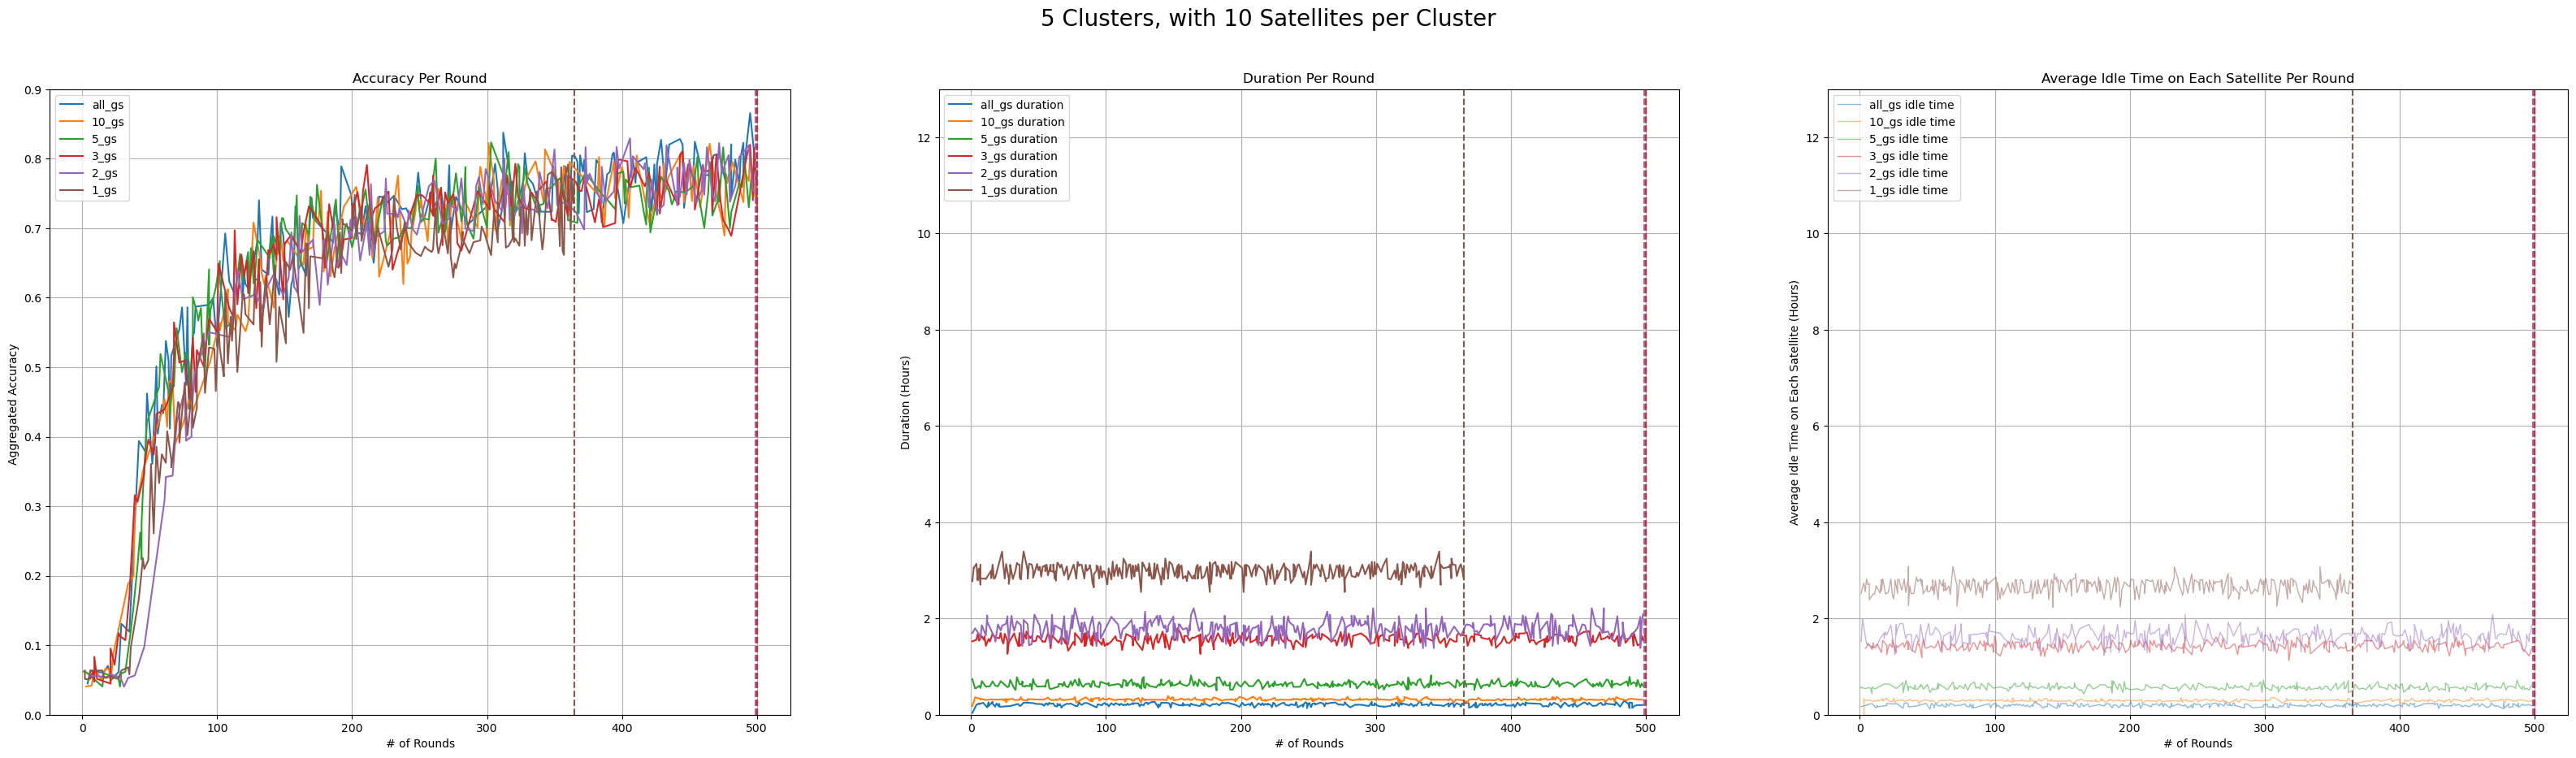

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax =  plt.subplots(1, 3, figsize=(40,10))

col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig.suptitle("5 Clusters, with 10 Satellites per Cluster", fontsize=20)
plt.subplot(1, 3, 1)
for name_list,i in zip(reversed(name),range(6)):
    df = pd.DataFrame(results2_data[name_list+"_acc"]["2_3"]).T
    df_2 = pd.DataFrame(results2_data[name_list+"_server_round"]["2_3"]).T
    
    plt.axvline(df_2["server_round"].iloc[-1], linestyle="--",c = col[i])
    plt.ylim(0,0.9)
    plt.plot(df_2[df["acc"].notnull()],df[df["acc"].notnull()],label = name_list,linewidth = 1.5, c = col[i])
    plt.xlabel("# of Rounds")
    plt.ylabel("Aggregated Accuracy ")
    plt.title("Accuracy Per Round")

plt.legend()
plt.grid()

plt.subplot(1,3,3)
for name_list,i in zip(reversed(name),range(6)):
    df = pd.DataFrame(results2_data[name_list+"_idle_time_sat_avg"]["2_3"]).T

    # df_3 = pd.DataFrame(results2_data[name_list+"_duration"]["2_3"]).T
    df_2 = pd.DataFrame(results2_data[name_list+"_server_round"]["2_3"]).T
    plt.axvline(df_2["server_round"].iloc[-1], linestyle="--",c = col[i])

    # plt.plot(df_2[df_3["duration"].notnull()],df_3[df_3["duration"].notnull()]/60/60,label = name_list+str(" duration"),linewidth = 1.5, c = col[i], alpha = 1)
    plt.plot(df_2[df["idle_time_avg"].notnull()],df[df["idle_time_avg"].notnull()]/60/60,label = name_list+str(" idle time"),linewidth = 1, c = col[i], alpha = 0.5)
    plt.ylim(0,13)
    plt.xlabel("# of Rounds")
    plt.ylabel("Average Idle Time on Each Satellite (Hours)")
    plt.title("Average Idle Time on Each Satellite Per Round")

plt.legend()
plt.grid()

plt.subplot(1,3,2)
for name_list,i in zip(reversed(name),range(6)):
    # df = pd.DataFrame(results2_data[name_list+"_idle_time_total_avg"]["2_3"]).T

    df_3 = pd.DataFrame(results2_data[name_list+"_duration"]["2_3"]).T
    df_2 = pd.DataFrame(results2_data[name_list+"_server_round"]["2_3"]).T
    plt.axvline(df_2["server_round"].iloc[-1], linestyle="--",c = col[i])

    plt.plot(df_2[df_3["duration"].notnull()],df_3[df_3["duration"].notnull()]/60/60,label = name_list+str(" duration"),linewidth = 1.5, c = col[i], alpha = 1)
    # plt.plot(df_2[df["idle_time_total"].notnull()],df[df["idle_time_total"].notnull()]/60/60/100,label = name_list+str(" idle time"),linewidth = 1, c = col[i], alpha = 0.5)
    plt.ylim(0,13)
    plt.xlabel("# of Rounds")
    plt.ylabel("Duration (Hours)")
    plt.title("Duration Per Round")

plt.legend()
plt.grid()


# plt.subplot(1, 3, 3)

# plt.legend()
# plt.grid()

In [3]:
# Just some settings I set when running the tests that will make it easier to build the gaphs

epochs = [10] #[5,10,25,50,100]
sats = [1,2,5,10] #[1,2,5,10,25,50]
clusters = [1,2,5,10] #[1,5,25]
name = ["1_gs","2_gs","3_gs","5_gs","10_gs","all_gs"]
n_sat_c = 2
n_c = 25

config = {
        "name": "Pls",
        "round": 500,
        "epochs": 3,
        "trial": 5,
        "clients": n_sat_c*n_c,
        "client_limit": 10,
        "dataset": "FEMNIST",
        "alg": "fedAvgSat",
        "learning_rate": 0.001,
        "momentum": 0.9,
        "wait_time" : 7,
        "sim_fname" : "/datasets/landsat/10s_10c_s_landsat.csv",
        "n_sat_in_cluster" : n_sat_c,
        "n_cluster" : n_c,
        "gs_locations" : "[Boston,]"
    }




In [6]:
import wandb
import numpy as np
api = wandb.Api()

results_data = {}
for name_list in name:
    data = {}
    data2 = {}
    data3 = {}
    data4 = {}
    data5 = {}
    rows = 0
    cols = 0
    for epoch in epochs:
        for sat in sats:
            for cluster in clusters:
                config["epochs"] = str(epoch)
                config["n_sat_in_cluster"] = str(sat)
                config["clients"] = str(sat*cluster)
                config["n_cluster"] = str(cluster)
                config["name"] = name_list
                t_name = "Work4_19"  
                for keys in config.keys():
                    if keys != "sim_fname" and keys != "gs_locations":
                        t_name = t_name + "_"+keys[:1]+str(config[keys])
                print(t_name)
                if not (rows == 0 and cols == 0):
                    runs = api.runs("fed_sats/"+t_name)
                    x = []
                    y = []
                    z = []
                    a = []
                    b = []
                    count = 0
                    for run in runs:
                        x.append(run.history()["acc"])
                        y.append(run.history()["duration"])
                        z.append(run.history()["idle_time_total"])
                        a.append(run.history()["idle_time_avg"])
                        b.append(run.history()["server_round"])
                        break

                    data[str(rows)+"_"+str(cols)] = x
                    data2[str(rows)+"_"+str(cols)] = y
                    data3[str(rows)+"_"+str(cols)] = z
                    data4[str(rows)+"_"+str(cols)] = a
                    data5[str(rows)+"_"+str(cols)] = b
                cols += 1
            cols = 0
            rows += 1
    results_data[name_list+"_acc"] = data
    results_data[name_list+"_duration"] = data2
    results_data[name_list+"_idle_time_total_avg"] = data3
    results_data[name_list+"_idle_time_sat_avg"] = data4
    results_data[name_list+"_server_round"] = data5


Work4_19_n1_gs_r500_e10_t5_c1_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n1_n1
Work4_19_n1_gs_r500_e10_t5_c2_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n1_n2
Work4_19_n1_gs_r500_e10_t5_c5_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n1_n5
Work4_19_n1_gs_r500_e10_t5_c10_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n1_n10
Work4_19_n1_gs_r500_e10_t5_c2_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n2_n1
Work4_19_n1_gs_r500_e10_t5_c4_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n2_n2
Work4_19_n1_gs_r500_e10_t5_c10_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n2_n5
Work4_19_n1_gs_r500_e10_t5_c20_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n2_n10
Work4_19_n1_gs_r500_e10_t5_c5_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n5_n1
Work4_19_n1_gs_r500_e10_t5_c10_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n5_n2
Work4_19_n1_gs_r500_e10_t5_c25_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n5_n5
Work4_19_n1_gs_r500_e10_t5_c50_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n5_n10
Work4_19_n1_gs_r500_e10_t5_c10_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n10_n1
Work4_19_n1_gs

In [8]:
import pickle

# save dictionary to person_data.pkl file
with open('fedavg_all_data.pkl', 'wb') as fp:
    pickle.dump(results_data, fp)
    print('dictionary saved successfully to file')

dictionary saved successfully to file


In [9]:
import pickle 
with open('fedavg_all_data.pkl', 'rb') as fp:
    results_data = pickle.load(fp)

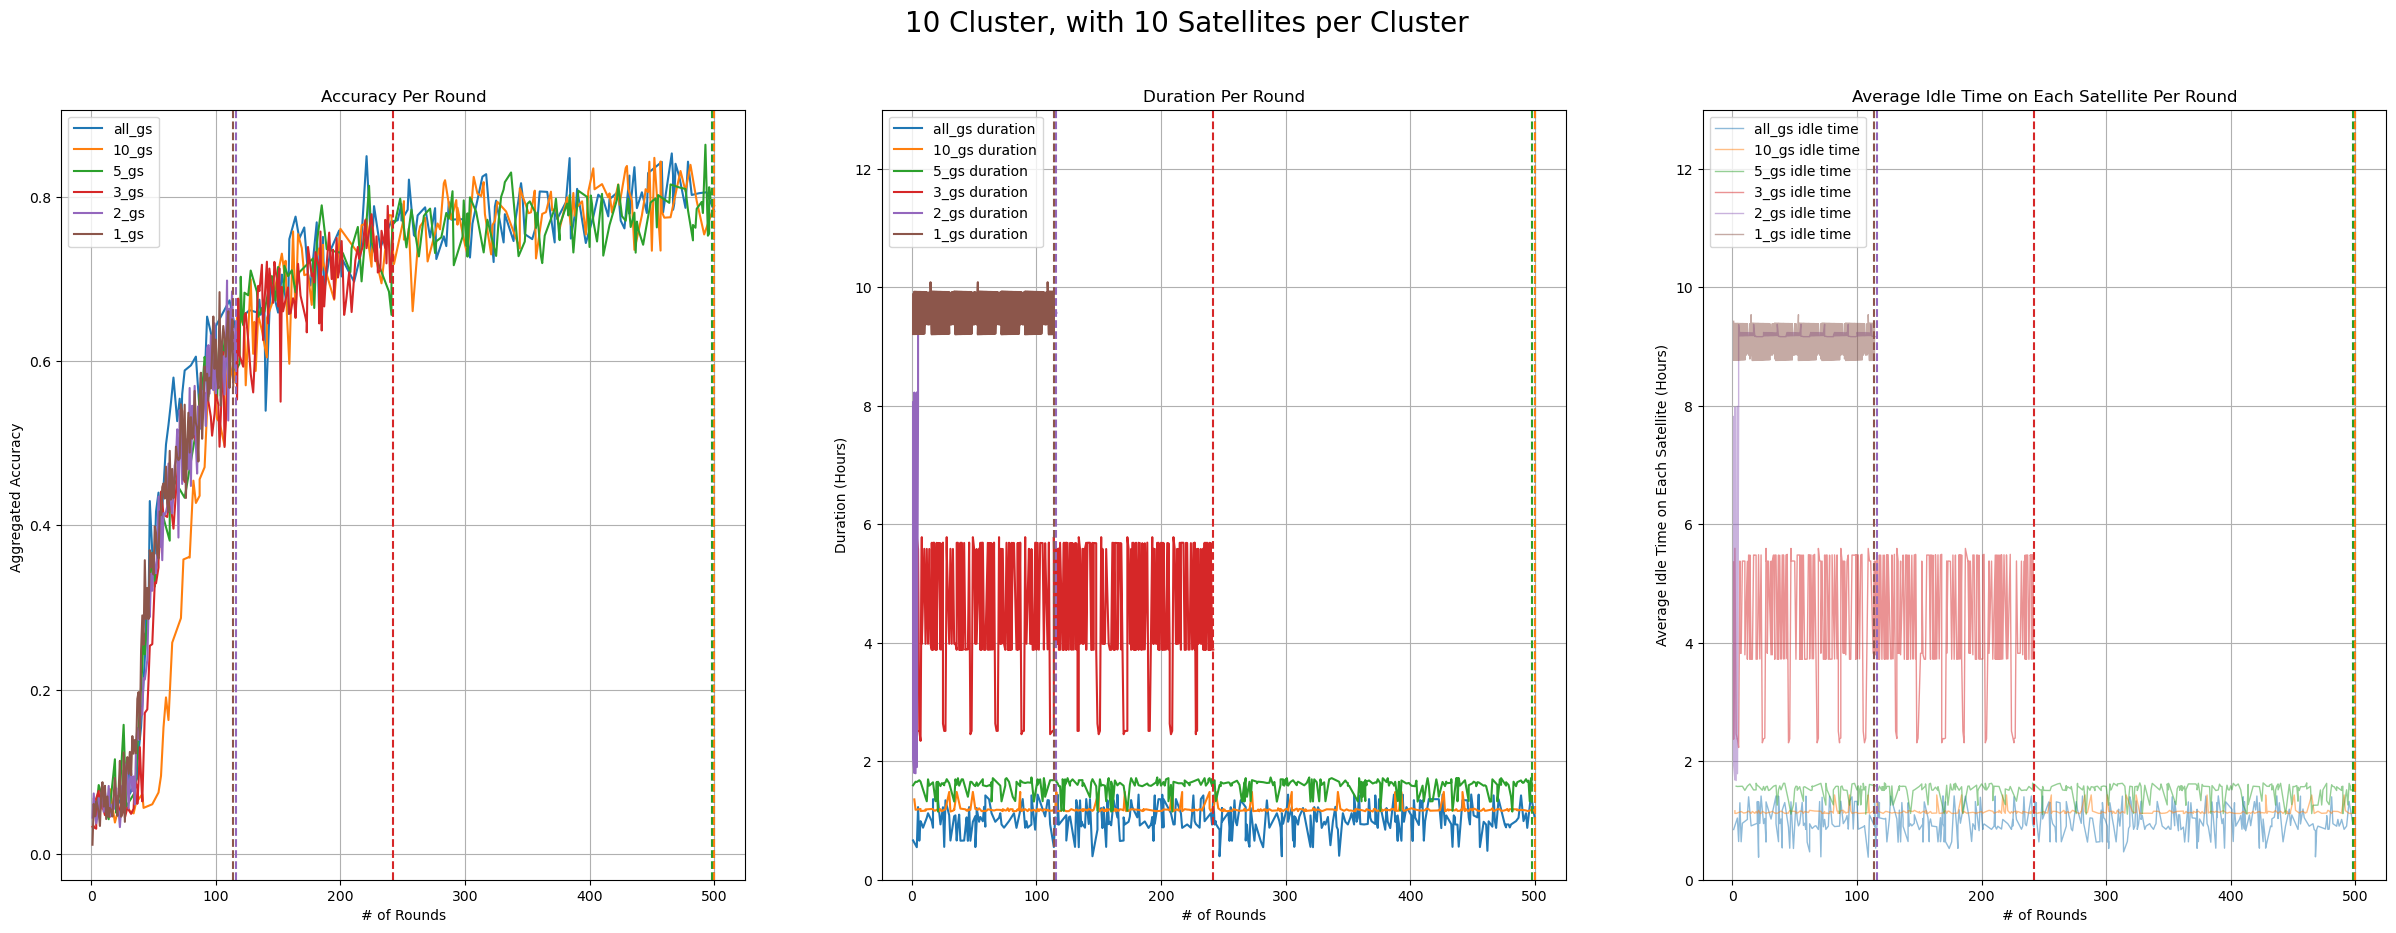

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax =  plt.subplots(1, 3, figsize=(30,10))

col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig.suptitle("10 Cluster, with 10 Satellites per Cluster", fontsize=20)
plt.subplot(1, 3, 1)
for name_list,i in zip(reversed(name),range(6)):
    df = pd.DataFrame(results_data[name_list+"_acc"]["3_3"]).T
    df_2 = pd.DataFrame(results_data[name_list+"_server_round"]["3_3"]).T
    
    plt.axvline(df_2["server_round"].iloc[-1], linestyle="--",c = col[i])

    plt.plot(df_2[df["acc"].notnull()],df[df["acc"].notnull()],label = name_list,linewidth = 1.5, c = col[i])
    plt.xlabel("# of Rounds")
    plt.ylabel("Aggregated Accuracy ")
    plt.title("Accuracy Per Round")

plt.legend()
plt.grid()

plt.subplot(1,3,3)
for name_list,i in zip(reversed(name),range(6)):
    df = pd.DataFrame(results_data[name_list+"_idle_time_sat_avg"]["3_3"]).T

    # df_3 = pd.DataFrame(results_data[name_list+"_duration"]["3_3"]).T
    df_2 = pd.DataFrame(results_data[name_list+"_server_round"]["3_3"]).T
    plt.axvline(df_2["server_round"].iloc[-1], linestyle="--",c = col[i])

    # plt.plot(df_2[df_3["duration"].notnull()],df_3[df_3["duration"].notnull()]/60/60,label = name_list+str(" duration"),linewidth = 1.5, c = col[i], alpha = 1)
    plt.plot(df_2[df["idle_time_avg"].notnull()],df[df["idle_time_avg"].notnull()]/60/60,label = name_list+str(" idle time"),linewidth = 1, c = col[i], alpha = 0.5)
    plt.ylim(0,13)
    plt.xlabel("# of Rounds")
    plt.ylabel("Average Idle Time on Each Satellite (Hours)")
    plt.title("Average Idle Time on Each Satellite Per Round")

plt.legend()
plt.grid()

plt.subplot(1,3,2)
for name_list,i in zip(reversed(name),range(6)):
    # df = pd.DataFrame(results_data[name_list+"_idle_time_total_avg"]["3_3"]).T

    df_3 = pd.DataFrame(results_data[name_list+"_duration"]["3_3"]).T
    df_2 = pd.DataFrame(results_data[name_list+"_server_round"]["3_3"]).T
    plt.axvline(df_2["server_round"].iloc[-1], linestyle="--",c = col[i])

    plt.plot(df_2[df_3["duration"].notnull()],df_3[df_3["duration"].notnull()]/60/60,label = name_list+str(" duration"),linewidth = 1.5, c = col[i], alpha = 1)
    # plt.plot(df_2[df["idle_time_total"].notnull()],df[df["idle_time_total"].notnull()]/60/60/100,label = name_list+str(" idle time"),linewidth = 1, c = col[i], alpha = 0.5)
    plt.ylim(0,13)
    plt.xlabel("# of Rounds")
    plt.ylabel("Duration (Hours)")
    plt.title("Duration Per Round")

plt.legend()
plt.grid()


# plt.subplot(1, 3, 3)

# plt.legend()
# plt.grid()

### Fedavg2 line plots

KeyError: 'idle_time_total'

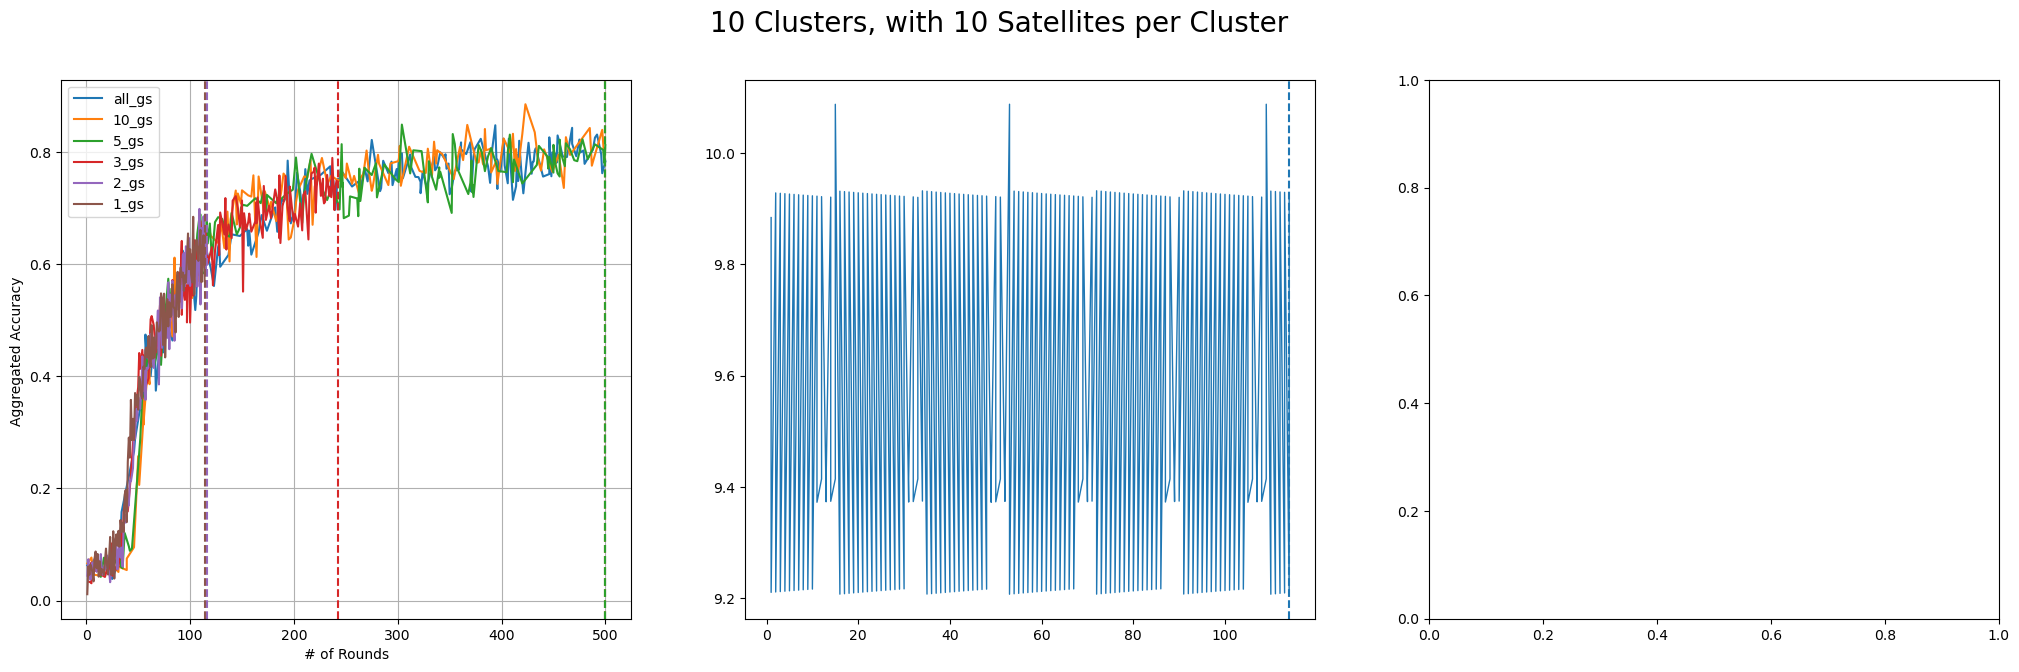

In [166]:

fig, ax =  plt.subplots(1, 3, figsize=(25,7))

col = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig.suptitle("10 Clusters, with 10 Satellites per Cluster", fontsize=20)
plt.subplot(1, 3, 1)
for name_list,i in zip(reversed(name),range(6)):
    df = pd.DataFrame(results_data[name_list+"_acc"]["3_3"]).T
    df_2 = pd.DataFrame(results_data[name_list+"_server_round"]["3_3"]).T
    
    plt.axvline(df_2["server_round"].iloc[-1], linestyle="--",c = col[i])

    plt.plot(df_2[df["acc"].notnull()],df[df["acc"].notnull()],label = name_list,linewidth = 1.5, c = col[i])
    plt.xlabel("# of Rounds")
    plt.ylabel("Aggregated Accuracy ")

plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
for name_list,i in zip(["1_gs"],range(1)):
    df = pd.DataFrame(results_data[name_list+"_duration"]["3_3"]).T
    df_3 = pd.DataFrame(results_data[name_list+"_idle_time_total_avg"]["3_3"]).T
    df_2 = pd.DataFrame(results_data[name_list+"_server_round"]["3_3"]).T
    
    plt.axvline(df_2["server_round"].iloc[-1], linestyle="--",c = col[i])

    plt.plot(df_2[df["duration"].notnull()],df[df["duration"].notnull()]/60/60,label = "Duration of Round",linewidth = 1, c = col[i])
    plt.plot(df_2[df["idle_time_total"].notnull()],df_3[df_3["idle_time_total"].notnull()]/60/60/100,label = "Average Satellite Idle Time",linewidth = 1, c = col[i])
    plt.xlabel("# of Rounds")
    # plt.ylim(0,10.5)
    plt.ylabel("Time Elapsed(Hours)")

plt.legend()
plt.grid()

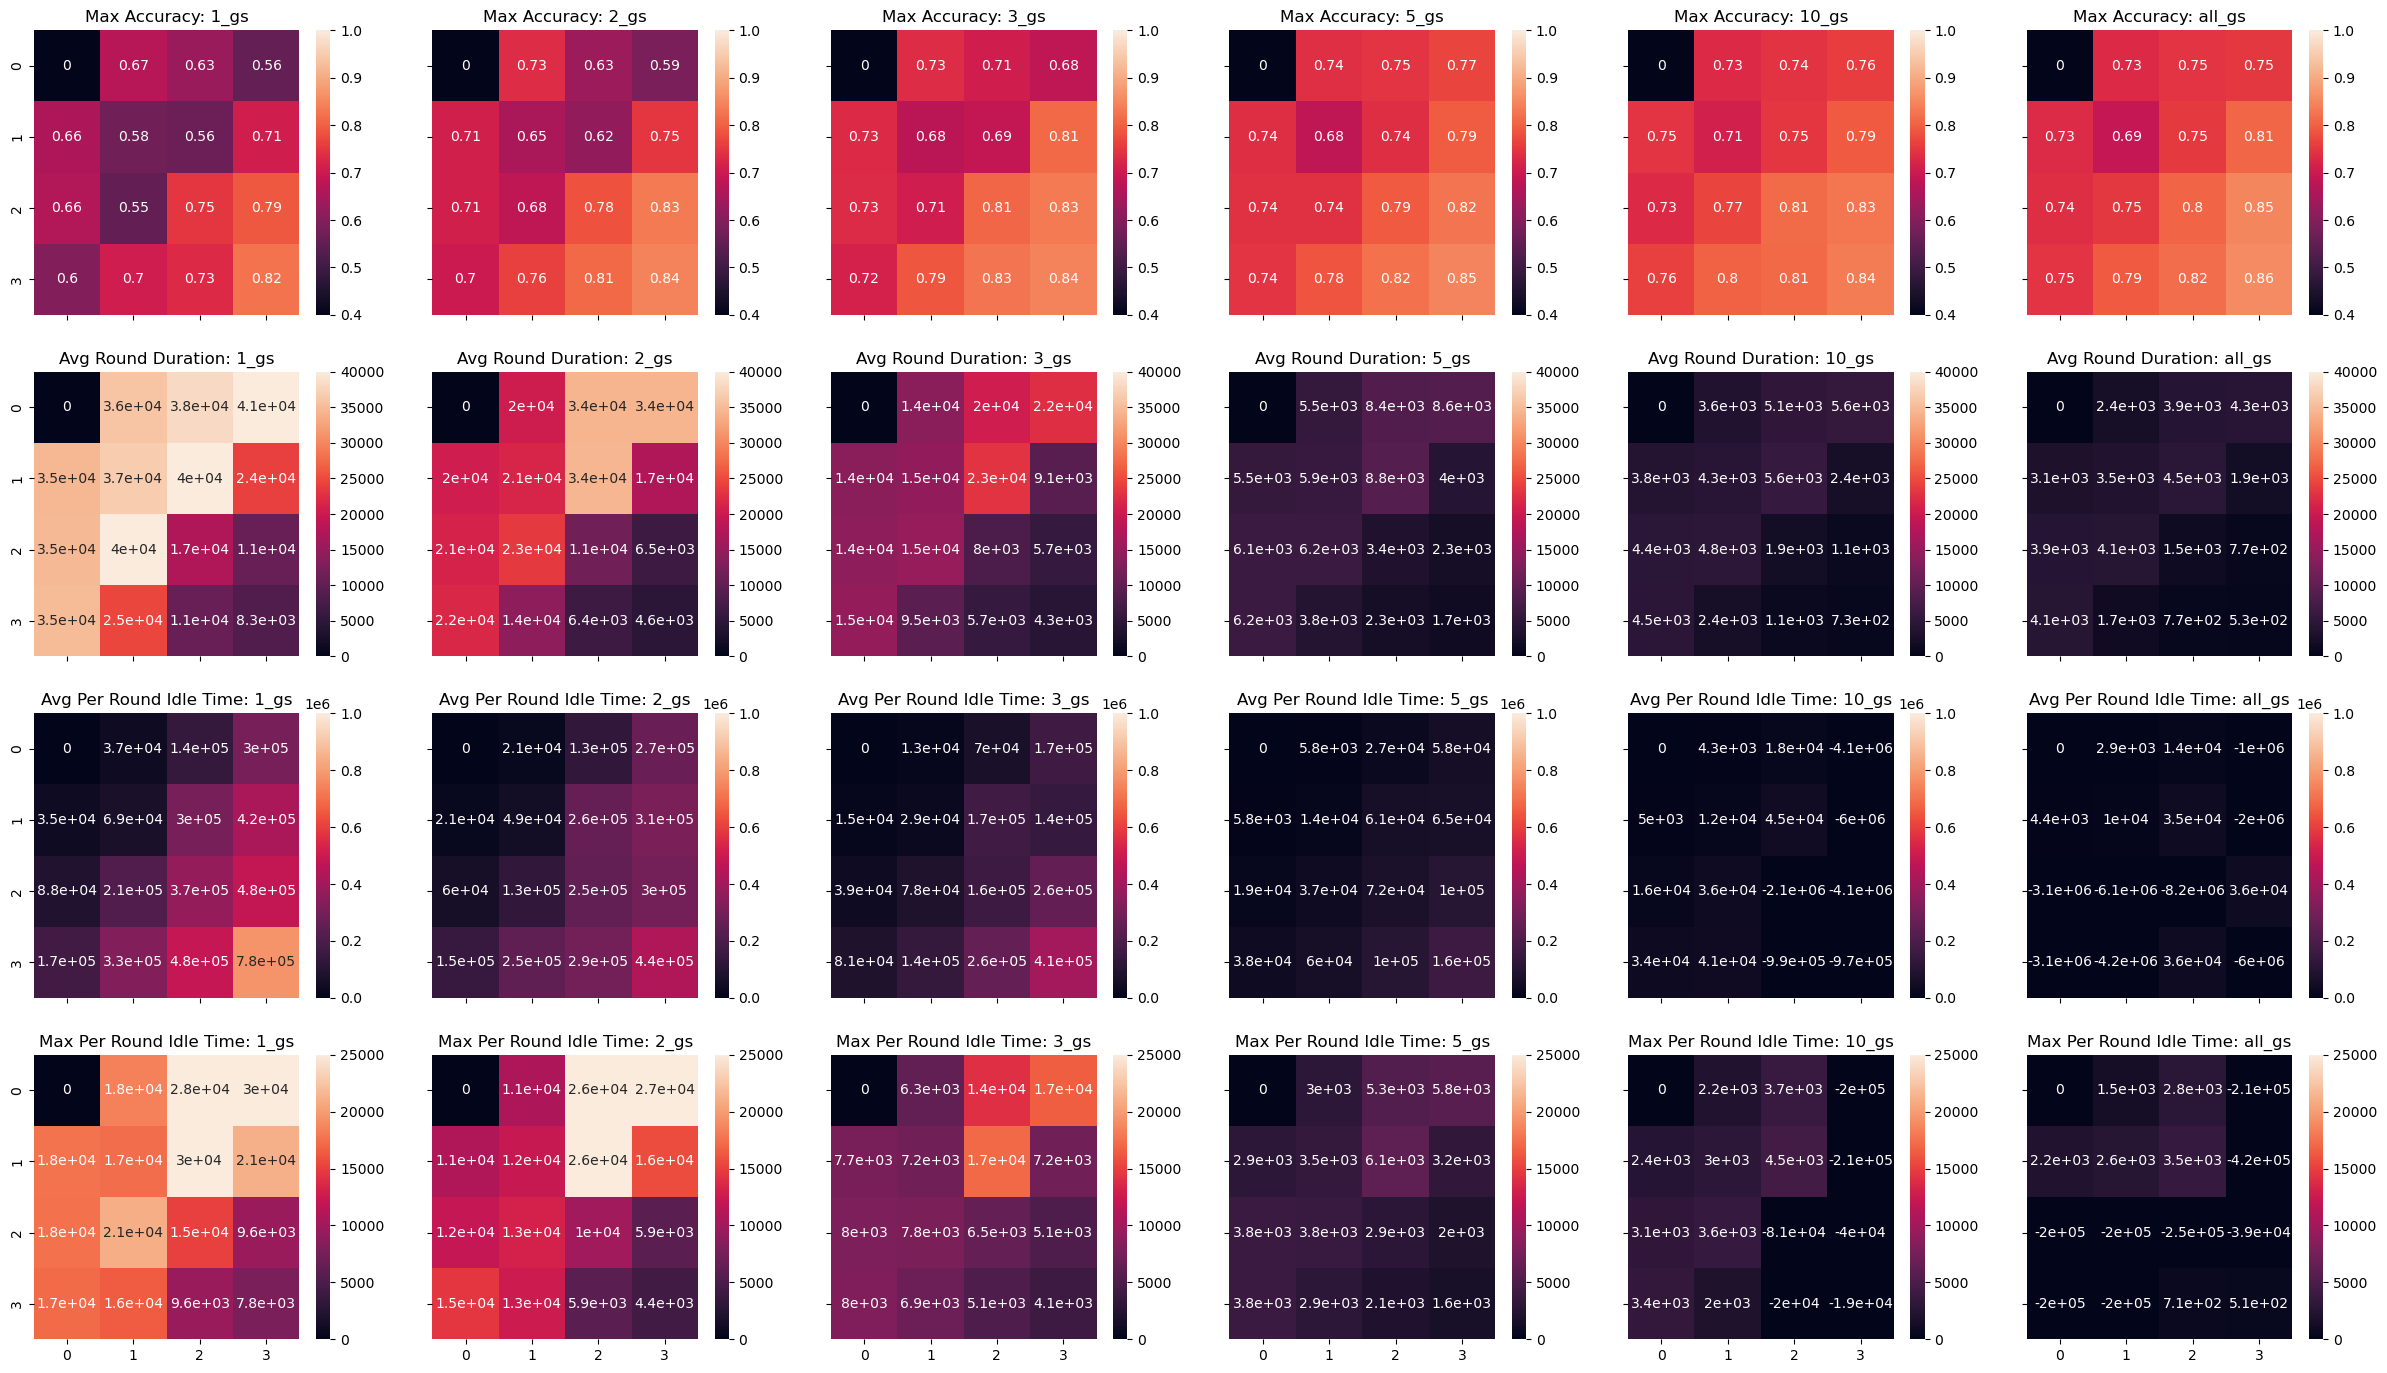

In [9]:
import pickle

# save dictionary to person_data.pkl file
with open('fedavg_alldata.pkl', 'wb') as fp:
    pickle.dump(results, fp)
    print('dictionary saved successfully to file')

### NEXT THINGS TO PLOT:
- all of the things but side by side in a time based plot
- show how limits in number of rounds for specific runs vs others
- show time line how much things differ for duration vs idle time and when things end idle time wise
- all the other federated learning techniques


In [24]:
import wandb
api = wandb.Api()

runs = api.runs("fed_sats/Work4_19_n10_gs_r500_e10_t5_c20_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n2_n10")
for run in runs:
    print(run.history())
# if run.state == "finished":
#     for i, row in run.history().iterrows():
#       print(row["_timestamp"], row["accuracy"])

          acc      loss  duration    _timestamp  server_round  _step  \
0         NaN       NaN  4806.962  1.713609e+09             2      3   
1    0.036176  0.190907       NaN  1.713609e+09             2      5   
2    0.064690  0.198048       NaN  1.713609e+09             4     11   
3         NaN       NaN  5666.666  1.713609e+09             7     19   
4    0.050667  0.188031       NaN  1.713609e+09             7     20   
..        ...       ...       ...           ...           ...    ...   
495       NaN       NaN  4243.169  1.713609e+09           496   1486   
496       NaN       NaN  5673.054  1.713609e+09           497   1488   
497  0.808399  0.036238       NaN  1.713609e+09           498   1493   
498       NaN       NaN  4848.156  1.713609e+09           500   1497   
499       NaN       NaN  1686.758  1.713609e+09           500   1498   

     stop_time_sec  start_time_sec  idle_time_avg    _runtime  idle_time_total  
0     1.712002e+09    1.711997e+09     4021.19840   20

In [4]:
import wandb
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("fed_sats-org/Work4_19_n10_gs_r500_e10_t5_c20_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n2_n10")
print(runs)
# hist_list = [] 
# for run in runs: 
#     if not 'val/loss' in run.summary:
#         continue

#     name = run.config['model']['_target_'].split('.')[-1]
#     hist = run.history(keys=['epoch', 'val/loss'])
#     hist['name'] = name
#     hist_list.append(hist)

# df = pd.concat(hist_list, ignore_index=True)
# df = df.query("`val/loss` != 'NaN'")

# sns.lineplot(x="epoch", y="val/loss", hue="name", data=df)
# plt.show()

<Runs fed_sats-org/Work4_19_n10_gs_r500_e10_t5_c20_c10_dFEMNIST_afedAvgSat_l0.001_m0.9_w7_n2_n10>
